In [1]:
import os
os.chdir('/Users/yanghy@us.ibm.com/Desktop/test')
import pandas as pd
from pulp import *
import numpy as np
import sys
from numpy import dot
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from allocation_notebook import * # it contains optimization functions

In [2]:
# this is the directory that you have data
directory = '/Users/yanghy@us.ibm.com/Desktop/processed/original' 
wfpd = readcsv(directory)

In [3]:
sut_target = 0.8 # default target
collapse_group = False # default collapse
FTE_time = 60*2080 # default FTE mins per annum

In [4]:
pop_chronic_trend = wfpd['pop_chronic_trend']
pop_chronic_prev = wfpd['pop_chronic_prev']
pop_chronic_trend = wfpd['pop_chronic_trend']
chron_care_freq = wfpd['chron_care_freq']
geo_area = wfpd['geo_area_list']
service_characteristics = wfpd['service_characteristics']
pop_acute_need = wfpd['pop_acute_need']
population = wfpd['population']
provider_supply = wfpd['provider_supply']
pop_prev_need = wfpd['pop_prev_need']
provider_list = wfpd['provider_list']
encounter_detail = wfpd['encounter_detail']
overhead_work = wfpd['overhead_work']

In [5]:
#################################################################
# user inputs here - please change these
# option: 'ideal_staffing', 'ideal_staffing_current', 'service_allocation'
# subpotion: 
# for ideal_staffing' and 'ideal_staffing_current':"all_combination", "wage_max", "wage_weight"
# for service_allocation: subpotion = None
# for suboption ="wage_max", sub_option_value = maximum wage
# for suboption ="wage_weight", sub_option_value = wage weight

year = '2020'; current_year = '2018'; geo = 'State of Utah'
option1 = 'ideal_staffing' ; sub_option1 = "all_combination"; sub_option_value1 = None
###################################################################
#then run main function
out1, supply1 = main(geo, year, current_year, option1, sub_option1, sub_option_value1, 
                     sut_target, collapse_group, FTE_time, pop_chronic_trend, 
                     pop_chronic_prev, chron_care_freq, geo_area, service_characteristics, 
                     pop_acute_need, population, provider_supply , pop_prev_need , 
                     provider_list , encounter_detail, overhead_work)


In [6]:
out1.keys()

dict_keys(['total_wage', 'total_sutab', 'FTE', 'detail_f2f_mini'])

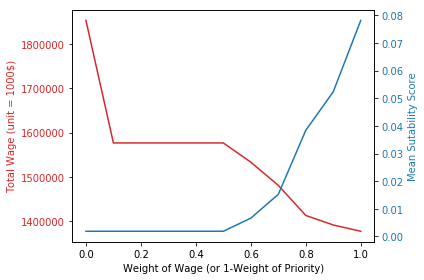

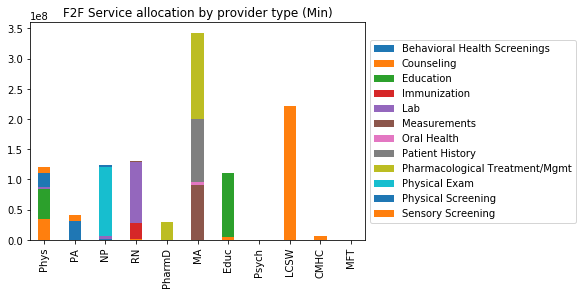

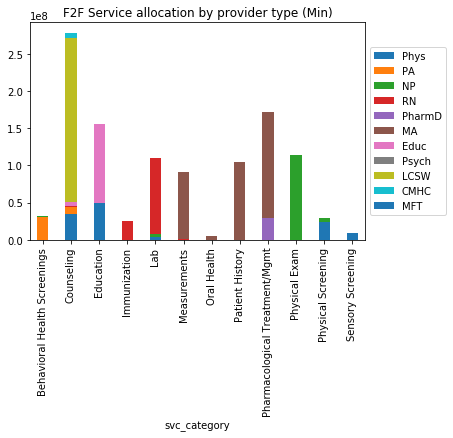

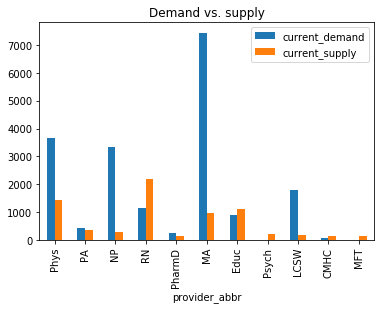

         Total Wage  Total sutability    Phys     PA      NP      RN  PharmD  \
w_0.0  1.853958e+09          0.001875  4751.0  647.5  3495.5  2345.0     0.0   
w_0.1  1.576637e+09          0.001875  3669.0  413.0  3341.5  1129.5   233.5   
w_0.2  1.576637e+09          0.001875  3669.0  413.0  3341.5  1129.5   233.5   
w_0.3  1.576637e+09          0.001875  3669.0  413.0  3341.5  1129.5   233.5   
w_0.4  1.576637e+09          0.001875  3669.0  413.0  3341.5  1129.5   233.5   
w_0.5  1.576637e+09          0.001875  3669.0  413.0  3341.5  1129.5   233.5   
w_0.6  1.533118e+09          0.006616  3327.0  413.0  3341.5  1129.5   233.5   
w_0.7  1.480574e+09          0.015235  2705.5  458.0  3918.0  1129.5   233.5   
w_0.8  1.412470e+09          0.038408  2705.5  333.5  2371.0  2782.5   233.5   
w_0.9  1.390912e+09          0.052362  2705.5   90.0  2578.5  2809.0     0.0   
w_1.0  1.376714e+09          0.078189  2705.5   90.0  2578.5  2792.0     0.0   

           MA    Educ  Psych    LCSW   

In [7]:
# it shows total wage, total sutability & FTE and 
# plot - you can change 0.1 to other value [0~1]
if( isinstance(out1, dict) ):
    plotall(0.1, out1, supply1, option1, sub_option1, provider_list) 
    print( summaryout(out1,sub_option1 ) )

In [8]:
out1['detail_f2f_mini']

,encounter_category,encounter_type,svc_category,svc_desc,Phys,PA,NP,RN,PharmD,MA,Educ,Psych,LCSW,CMHC,MFT,weight
0,Preventive,Well-Child Visits-Infant,Patient History,Patient History,0.0,1998620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Preventive,Well-Child Visits-Infant,Behavioral Health Screenings,Child Developmental Screening,0.0,339766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Preventive,Well-Child Visits-Infant,Behavioral Health Screenings,Child Developmental Surveillance,0.0,799449.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Preventive,Well-Child Visits-Infant,Behavioral Health Screenings,Psychosocial/Behavioral Surveillance,0.0,399725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Preventive,Well-Child Visits-Infant,Behavioral Health Screenings,Maternal Depression Screening,0.0,799449.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Preventive,Well-Child Visits-Infant,Measurements,length/height & weight,0.0,0.0,0.0,399725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Preventive,Well-Child Visits-Infant,Measurements,head circumference,0.0,0.0,0.0,399725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Preventive,Well-Child Visits-Infant,Measurements,BP,0.0,0.0,0.0,799449.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Preventive,Well-Child Visits-Infant,Physical Exam,Physical Exam,0.0,0.0,1998620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Preventive,Well-Child Visits-Infant,Sensory Screening,Vision Screening,399725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
year = '2020'; current_year = '2018'
option2 = 'ideal_staffing_current' ; sub_option2 = "wage_max"; sub_option_value2 = 10000; #s_weight = 0.1
geo = 'State of Utah'
out2, supply2 = main(geo, year, current_year, option2, sub_option2, sub_option_value2, sut_target, collapse_group, FTE_time, 
         pop_chronic_trend, pop_chronic_prev, chron_care_freq, geo_area, service_characteristics, 
         pop_acute_need, population, provider_supply , pop_prev_need , provider_list , encounter_detail, overhead_work)

Try higher maximum wage. Available minimum/maximum wage to minimize wage or minimize         sutability score is:1426824328.0 and 1613219038.0


In [10]:
if( isinstance(out2, dict) ):
    summaryout(out2,sub_option2)
    print( plotall(0.1, out2, supply2, option2, sub_option2, provider_list) )

In [11]:
out2

'Try higher maximum wage. Available minimum/maximum wage to minimize wage or minimize         sutability score is:1426824328.0 and 1613219038.0'

In [ ]:
#################################################################
# user inputs here - please change these
year = '2018'; current_year = '2018'; geo = 'State of Utah'
option3 = 'service_allocation' ; sub_option3 = None; sub_option_value3 = None
###################################################################
#then run main function
out3, supply3 = main(geo, year, current_year, option3, sub_option3, sub_option_value3, 
                     sut_target, collapse_group, FTE_time, pop_chronic_trend, 
                     pop_chronic_prev, chron_care_freq, geo_area, service_characteristics, 
                     pop_acute_need, population, provider_supply , pop_prev_need , 
                     provider_list , encounter_detail, overhead_work)

In [ ]:
if( isinstance(out3, dict) ):
    plotall(sub_option_value3, out3, supply3, option3, sub_option3, provider_list) 